In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
df = pd.read_csv("retail_sales_dataset.csv")

In [33]:
print(df.head)

<bound method NDFrame.head of      Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount Age Group    

In [34]:
print(df.tail)

<bound method NDFrame.tail of      Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount Age Group    

In [36]:
print(df.shape)

(1000, 11)


In [17]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])

# Create Month Column
df['Month'] = df['Date'].dt.to_period('M')

In [18]:
print("Total Sales:", df['Total Amount'].sum())
print("Average Sale Value:", df['Total Amount'].mean())
print("Top Selling Category:", df.groupby('Product Category')['Total Amount'].sum().idxmax())


Total Sales: 456000
Average Sale Value: 456.0
Top Selling Category: Electronics


In [21]:
revenue_by_gender = df.groupby('Gender')['Total Amount'].sum()
print("\nRevenue by Gender:\n", revenue_by_gender)


Revenue by Gender:
 Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [22]:
revenue_by_age = df.groupby('Age Group')['Total Amount'].sum()
print("\nRevenue by Age Group:\n", revenue_by_age)


Revenue by Age Group:
 Age Group
18-25     84550
26-35     98480
36-50    139660
51-65    133310
Name: Total Amount, dtype: int64


<ipython-input-22-00bb84abbc4d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age = df.groupby('Age Group')['Total Amount'].sum()


In [23]:
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum()
print("\nRevenue by Product Category:\n", revenue_by_category)


Revenue by Product Category:
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


In [24]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
print("\nMonthly Sales:\n", monthly_sales)


Monthly Sales:
 Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


<ipython-input-25-6d79c8d37992>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='Blues_d')


([0, 1, 2],
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

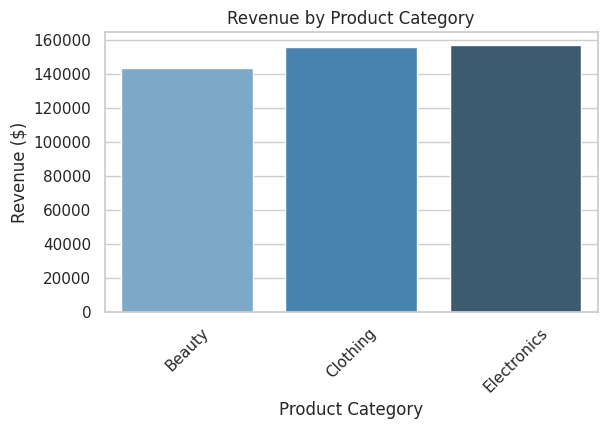

In [25]:
plt.figure(figsize=(14, 8))

# Bar - Revenue by Product Category
plt.subplot(2, 2, 1)
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='Blues_d')
plt.title('Revenue by Product Category')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

<ipython-input-26-6b3f38dc35b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")


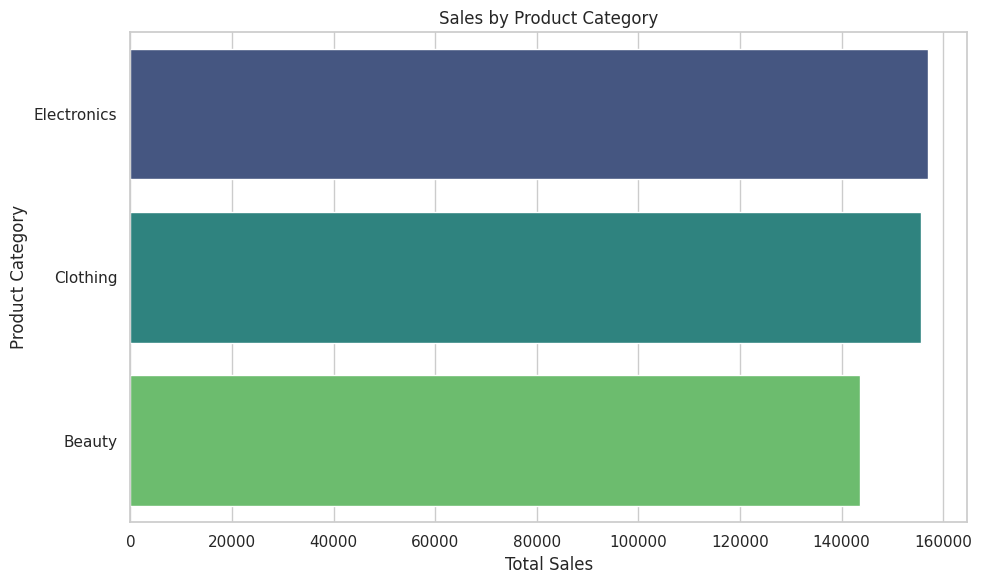

In [26]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

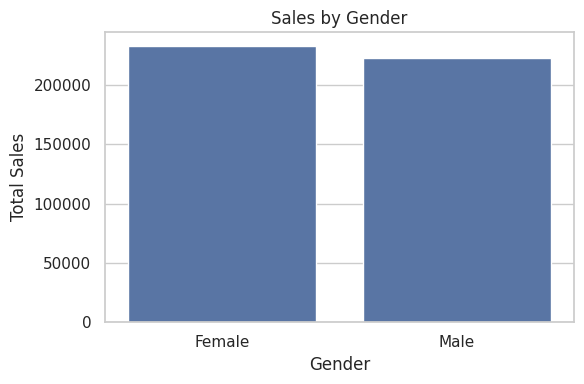

In [27]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title("Sales by Gender")
plt.ylabel("Total Sales")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Revenue Share by Gender')

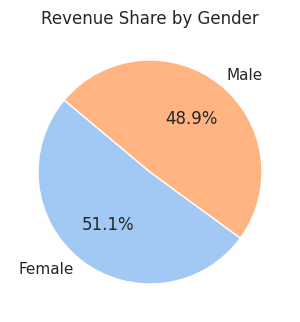

In [28]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 2)
plt.pie(revenue_by_gender.values, labels=revenue_by_gender.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Share by Gender')

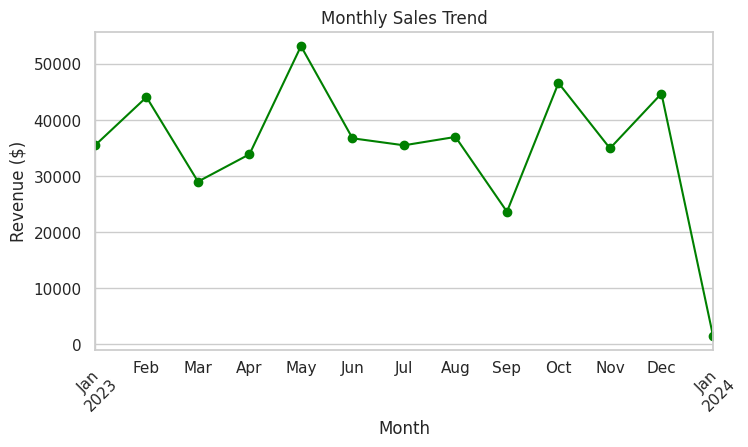

In [30]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 4)
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()